    latitude   longitude     height  velocity_north  velocity_east  \
0  34.116409  242.906804  762.11978         0.01648       -0.01573   
1  34.116409  242.906804  762.10883         0.01648       -0.01573   
2  34.116409  242.906805  762.09364         0.01648       -0.01573   
3  34.116409  242.906805  762.09073         0.01648       -0.01573   
4  34.116409  242.906805  762.07699         0.01648       -0.01573   

   velocity_up  std_north  std_east   std_up  
0      0.00261     0.0002   0.00037  0.00053  
1      0.00261     0.0002   0.00037  0.00053  
2      0.00261     0.0002   0.00037  0.00053  
3      0.00261     0.0002   0.00037  0.00053  
4      0.00261     0.0002   0.00037  0.00053  


grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: SRTM15 Earth Relief v2.7 original at 15x15 arc seconds [Tozer et al., 2019].
grdblend [NOTICE]:   -> Download 10x10 degree grid tile (earth_relief_15s_p): N30W130


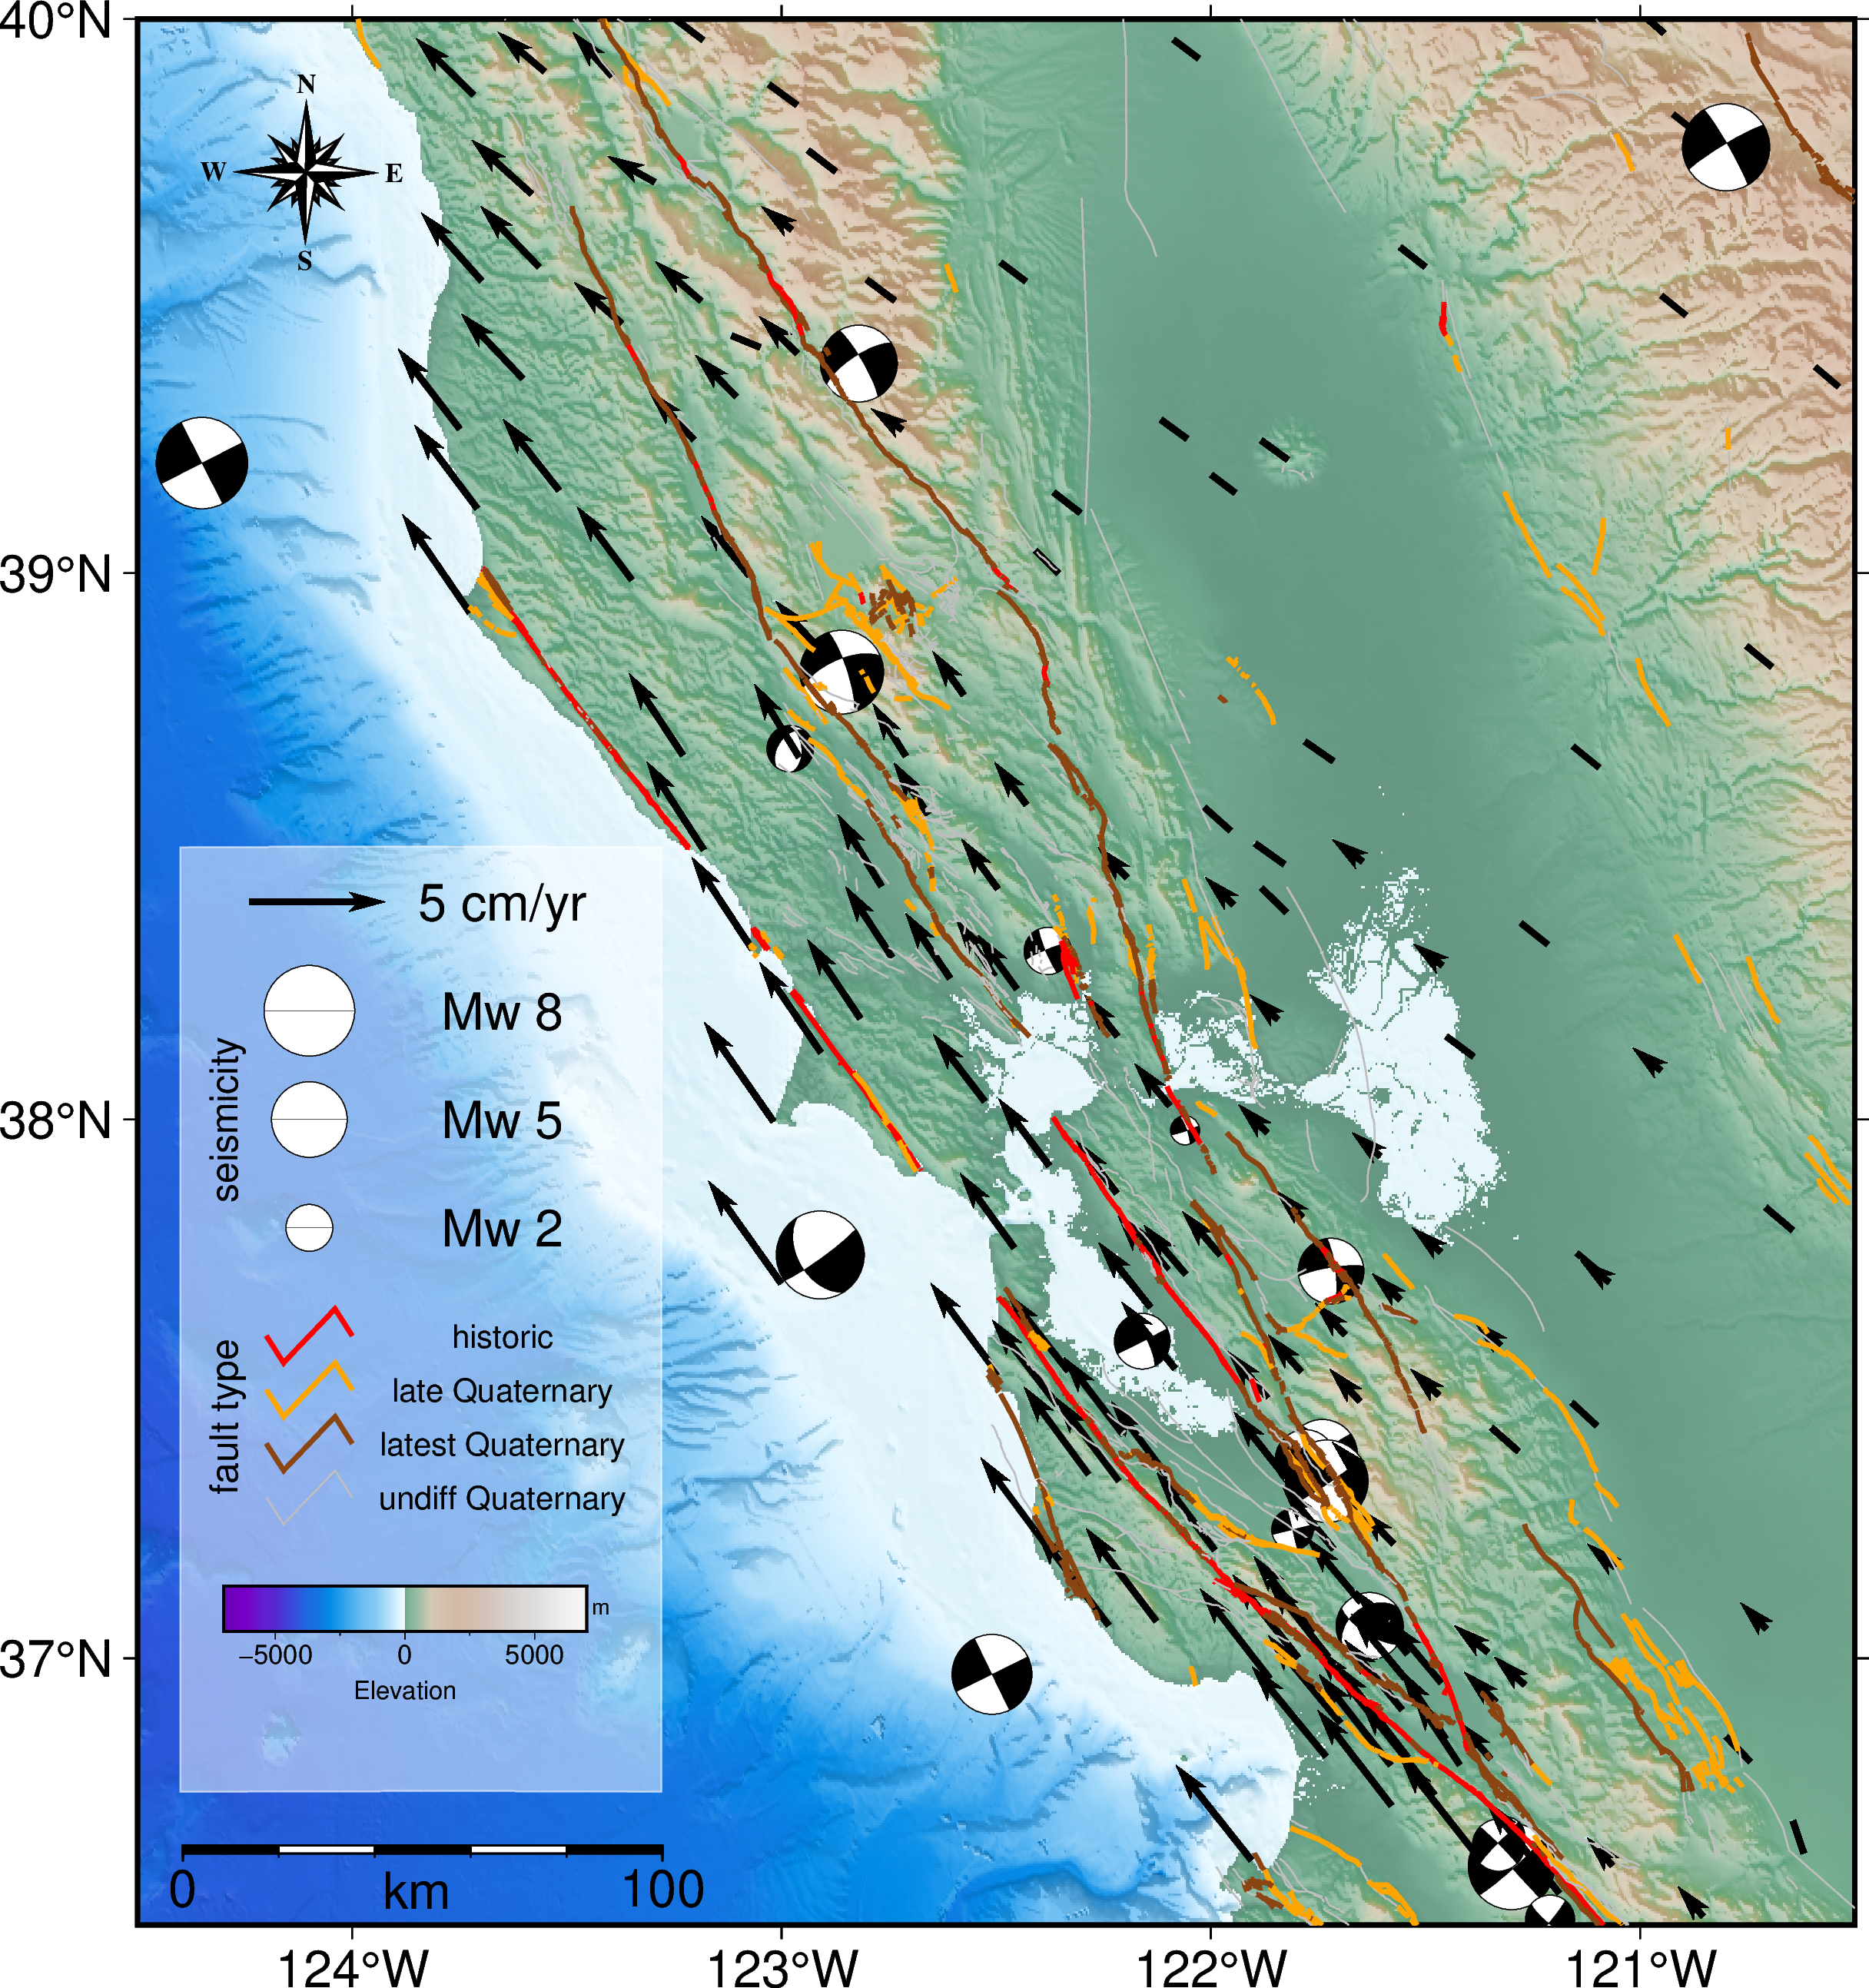

In [5]:
### overall figure 

import pandas as pd
import verde as vd
import pygmt
import numpy as np
import csv

# The data are in a pandas.DataFrame
data = vd.datasets.fetch_california_gps()
print(data.head())
arr = data.to_numpy()

arrdata = np.zeros((arr.shape[0],8))
arrdata[:,0] = arr[:,1]
arrdata[:,1] = arr[:,0]
arrdata[:,2] = arr[:,4]
arrdata[:,3] = arr[:,3]
arrdata[:,4] = arr[:,7]
arrdata[:,5] = arr[:,6]
arrdata[:,6] = np.zeros((arr.shape[0]))
#arrdata[:,7] = np.empty([arr.shape[0]], dtype=str)
newrowarr = np.array([[-124.24,38+.4, .05, 0,0, .001, 0, 0]])
arrdata1 = np.vstack((arrdata, newrowarr))

# plot the seismicity from seis_gcmt.csv
# plot reverse, i.e. older seism first and newer last
with open('seis_gcmt.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    all_seis = np.zeros((42,11))
    for row in csv_reader:
        all_seis[line_count,0] = row[0] 
        all_seis[line_count,1] = row[1]
        all_seis[line_count,2] = '0'
        all_seis[line_count,3] = row[2]
        all_seis[line_count,4] = row[3]
        all_seis[line_count,5] = row[4]
        all_seis[line_count,6] = row[5]
        all_seis[line_count,7] = row[6]
        all_seis[line_count,8] = row[7]
        all_seis[line_count,9] = row[8]
        all_seis[line_count,10] = row[9]
        
        line_count += 1
    #print(all_seis)
new_rows = np.array([[-124.1,37.8+.4, 0, 90, 90, 90, 270, 90, 90, 8, 23],
                     [-124.1,37.6+.4, 0, 90, 90, 90, 270, 90, 90, 5, 23],
                     [-124.1,37.4+.4, 0, 90, 90, 90, 270, 90, 90, 2, 23]])
allseis1 = np.vstack((all_seis, new_rows))
allseis1[:,9] = allseis1[:,9]**20

# for fault legend 
# historic -124.1,37.2
x1val = np.array([-124, -124.04, -124.16, -124.2])
y1val = .4+ np.array([37.2, 37.25, 37.15, 37.2])
# late quaternary -124.1,37
x2val = np.array([-124, -124.04, -124.16, -124.2])
y2val = .4+np.array([37.1, 37.15, 37.05, 37.1])
# latest quaternary 
x3val = np.array([-124, -124.04, -124.16, -124.2])
y3val = .4+np.array([37, 37.05, 36.95, 37])
# undifferentiated quaternary 
x4val = np.array([-124, -124.04, -124.16, -124.2])
y4val = .4+np.array([36.9, 36.95, 36.85, 36.9])


grid = pygmt.datasets.load_earth_relief(
    resolution="15s", region=[-124.5, -120.5, 36.5, 40]
)

fig = pygmt.Figure()
pygmt.makecpt(cmap="terra", series=[-7000, 7000])

# Define figure configuration
pygmt.config(FONT_TITLE="12p,5", MAP_TITLE_OFFSET="1p", MAP_FRAME_TYPE="plain", FONT_ANNOT_PRIMARY="16p")

#fig.grdimage(grid=grid, frame="a", projection="M15c", cmap="oleron")


with fig.subplot(
    nrows=1,
    ncols=1,
    figsize=("28c", "21c"),
    sharex="b",
    sharey="l",
):

    # E.g. "0/90" illuminates light source from the North (top) and East
    # (right), and so on
    for azi in ["180/225"]:
        # "e" and "t" are cumulative Laplace distribution and cumulative
        # Cauchy distribution, respectively
        # "amp" (e.g. 1 or 10) controls the brightness value of the color
        for nor in ["t.3"]:
            # Making an intensity DataArray using azimuth and normalize
            # parameters
            shade = pygmt.grdgradient(grid=grid, azimuth=azi, normalize=nor)
            fig.grdimage(
                grid=grid,
                shading=shade,
                projection="M?",
                frame=["a1f1"],
                cmap=True,
                panel=True,
            )

    
    fig.plot(data=np.array([[-124.4,36.75,-123.28,38.5]]), style='r+s', pen=".5p,white", fill = "white@50", transparency=50)

    fig.meca(
        spec=allseis1,
        scale=".3c",  # in centimeters
        convention="gcmt",
        #compressionfill="gray70",
        #extensionfill="cornsilk",
        #pen="0.5p,gray30,solid",
        )
        
    fig.velo(
        data=arrdata1,
        pen="2p,black",
        uncertaintyfill="lightblue1",
        line=False,
        spec="e30/0.39/18",
        #frame=["WSne", "2g2f"],
        #projection="x0.8c",
        vector=".4c+p2p+e+gblack",
    )

    with open('clippedqfaults.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            faulttype = row[7]
            if line_count == 0:
                line_count += 1
                continue
            elif line_count < 16047:
            #elif line_count < 160:
                line_count += 1
                try:
                    # for linestring
                    faultloc = row[0]
                    floc1 = faultloc.split("(", 1)
                    floc2 = floc1[1].split(")",1)
                    floc3 = floc2[0].split(",")
                    #print(floc3)
                    floc3 = np.array(floc3)
                    xval = np.zeros((floc3.shape[0]))
                    yval = np.zeros((floc3.shape[0]))
                    for i in range(floc3.shape[0]):
                        xyval = floc3[i]
                        vals = xyval.split(" ")
                        xval[i] = np.float32(vals[0])
                        yval[i] = np.float32(vals[1])
                    if faulttype == 'undifferentiated Quaternary':
                        fig.plot(x=xval, y=yval, pen="0.5p,gray")
                    elif faulttype == 'historic': 
                        fig.plot(x=xval, y=yval, pen="1.5p,red")
                    elif faulttype == 'latest Quaternary': 
                        fig.plot(x=xval, y=yval, pen="1.5p,chocolate4")
                    elif faulttype == 'late Quaternary':
                        fig.plot(x=xval, y=yval, pen="1.5p,orange")
                
                except: 
                    # for multilinestring
                    faultloc = row[0]
                    floc1 = faultloc.split("(")
                    floc1 = np.array(floc1)
                    for i in range(floc1.shape[0]):
                        if i == 0:
                            continue
                        elif i == 1: 
                            continue
                        else:
                            floc2 = floc1[i]
                            floc3 = floc2.split(")",1)
            
                            floc4 = floc3[0].split(",")
                            floc4 = np.array(floc4)
            
                            xval = np.zeros((floc4.shape[0]))
                            yval = np.zeros((floc4.shape[0]))
                            for j in range(floc4.shape[0]):
                                xyval = floc4[j]
                                vals = xyval.split(" ")
                                xval[j] = np.float32(vals[0])
                                yval[j] = np.float32(vals[1])
    
                            if faulttype == 'undifferentiated Quaternary':
                                fig.plot(x=xval, y=yval, pen="0.5p,gray")
                            elif faulttype == 'historic': 
                                fig.plot(x=xval, y=yval, pen="1.5p,red")
                            elif faulttype == 'latest Quaternary': 
                                fig.plot(x=xval, y=yval, pen="1.5p,chocolate4")
                            elif faulttype == 'late Quaternary':
                                fig.plot(x=xval, y=yval, pen="1.5p,orange")
                            
            else:
                break
                

    

    fig.basemap(rose="jTL+w1.5c+lW,E,S,N+o.7c/.6c+f3", map_scale="jBL+w100k+o0.5c/0.7c+f")

    #fig.colorbar(frame=["a2500", "x+lElevation", "y+lm"])
    fig.colorbar(
        # Colorbar positioned at map coordinates (g) longitude/latitude 0.3/8.7,
        # with a length/width (+w) of 4 cm by 0.5 cm, and plotted horizontally (+h)
        position="g-124.3/37.05+w4c/.5c+h",
        #box=True,
        frame=["xa5000f2500+lElevation", "y+lm"],   #frame=["xa0.5f0.1+lVelocity", "y+lm/s"]
        scale=1,
    )
    fig.plot(x=x1val, y=y1val, pen="1.5p,red")
    fig.plot(x=x2val, y=y2val, pen="1.5p,orange")
    fig.plot(x=x3val, y=y3val, pen="1.5p,chocolate4")
    fig.plot(x=x4val, y=y4val, pen="0.5p,gray")
    
    #plot Magnitude Legend
    #fig.legend(spec=‘magnitude_leg.txt’,
    #            position=‘JTL+jTL+o0.1c+w1.6/4.0’,
    #            box=’+glavender’)

    fig.text(text="km", x=-123.85, y=36.565)
    fig.text(text="5 cm/yr", x=-123.65, y=.4+38)
    fig.text(text="Mw 8", x=-123.65, y=.4+37.8)
    fig.text(text="Mw 5", x=-123.65, y=.4+37.6)
    fig.text(text="Mw 2", x=-123.65, y=.4+37.4)

    fig.text(text="historic", x=-123.65, y=.4+37.2, font="10p,Helvetica,black")
    fig.text(text="late Quaternary", x=-123.65, y=.4+37.1, font="10p,Helvetica,black")
    fig.text(text="latest Quaternary", x=-123.65, y=.4+37, font="10p,Helvetica,black")
    fig.text(text="undiff Quaternary", x=-123.65, y=.4+36.9, font="10p,Helvetica,black")

    fig.text(text="fault type", x=-124.3, y=.4+37.05, font="12p,Helvetica,black", angle=90)
    fig.text(text="seismicity", x=-124.3, y=.4+37.6, font="12p,Helvetica,black", angle=90)
    
fig.show()


In [4]:
### overall figure 

import pandas as pd
import verde as vd
import pygmt
import numpy as np
import csv

# The data are in a pandas.DataFrame
data = vd.datasets.fetch_california_gps()
print(data.head())
arr = data.to_numpy()

arrdata = np.zeros((arr.shape[0],8))
arrdata[:,0] = arr[:,1]
arrdata[:,1] = arr[:,0]
arrdata[:,2] = arr[:,4]
arrdata[:,3] = arr[:,3]
arrdata[:,4] = arr[:,7]
arrdata[:,5] = arr[:,6]
arrdata[:,6] = np.zeros((arr.shape[0]))
#arrdata[:,7] = np.empty([arr.shape[0]], dtype=str)
newrowarr = np.array([[-124.24,38+.4, .05, 0,0, .001, 0, 0]])
arrdata1 = np.vstack((arrdata, newrowarr))


'/mnt/stor/geob/jlmd9g/Rishabh/gemlab/Papers/NorthCali_RSE2025/figures/Figure1'

In [6]:
#fig.savefig("fig1_par1.eps", dpi=400)

grdimage [WARNING]: (w - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdimage [WARNING]: w reset from -124.5 to -124.505226748
grdimage [WARNING]: (e - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdimage [WARNING]: e reset from -120.5 to -120.49868576
grdimage [WARNING]: (s - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdimage [WARNING]: s reset from 36.5 to 36.4915675131
grdimage [WARNING]: (n - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdimage [WARNING]: n reset from 40 to 40.0022494678


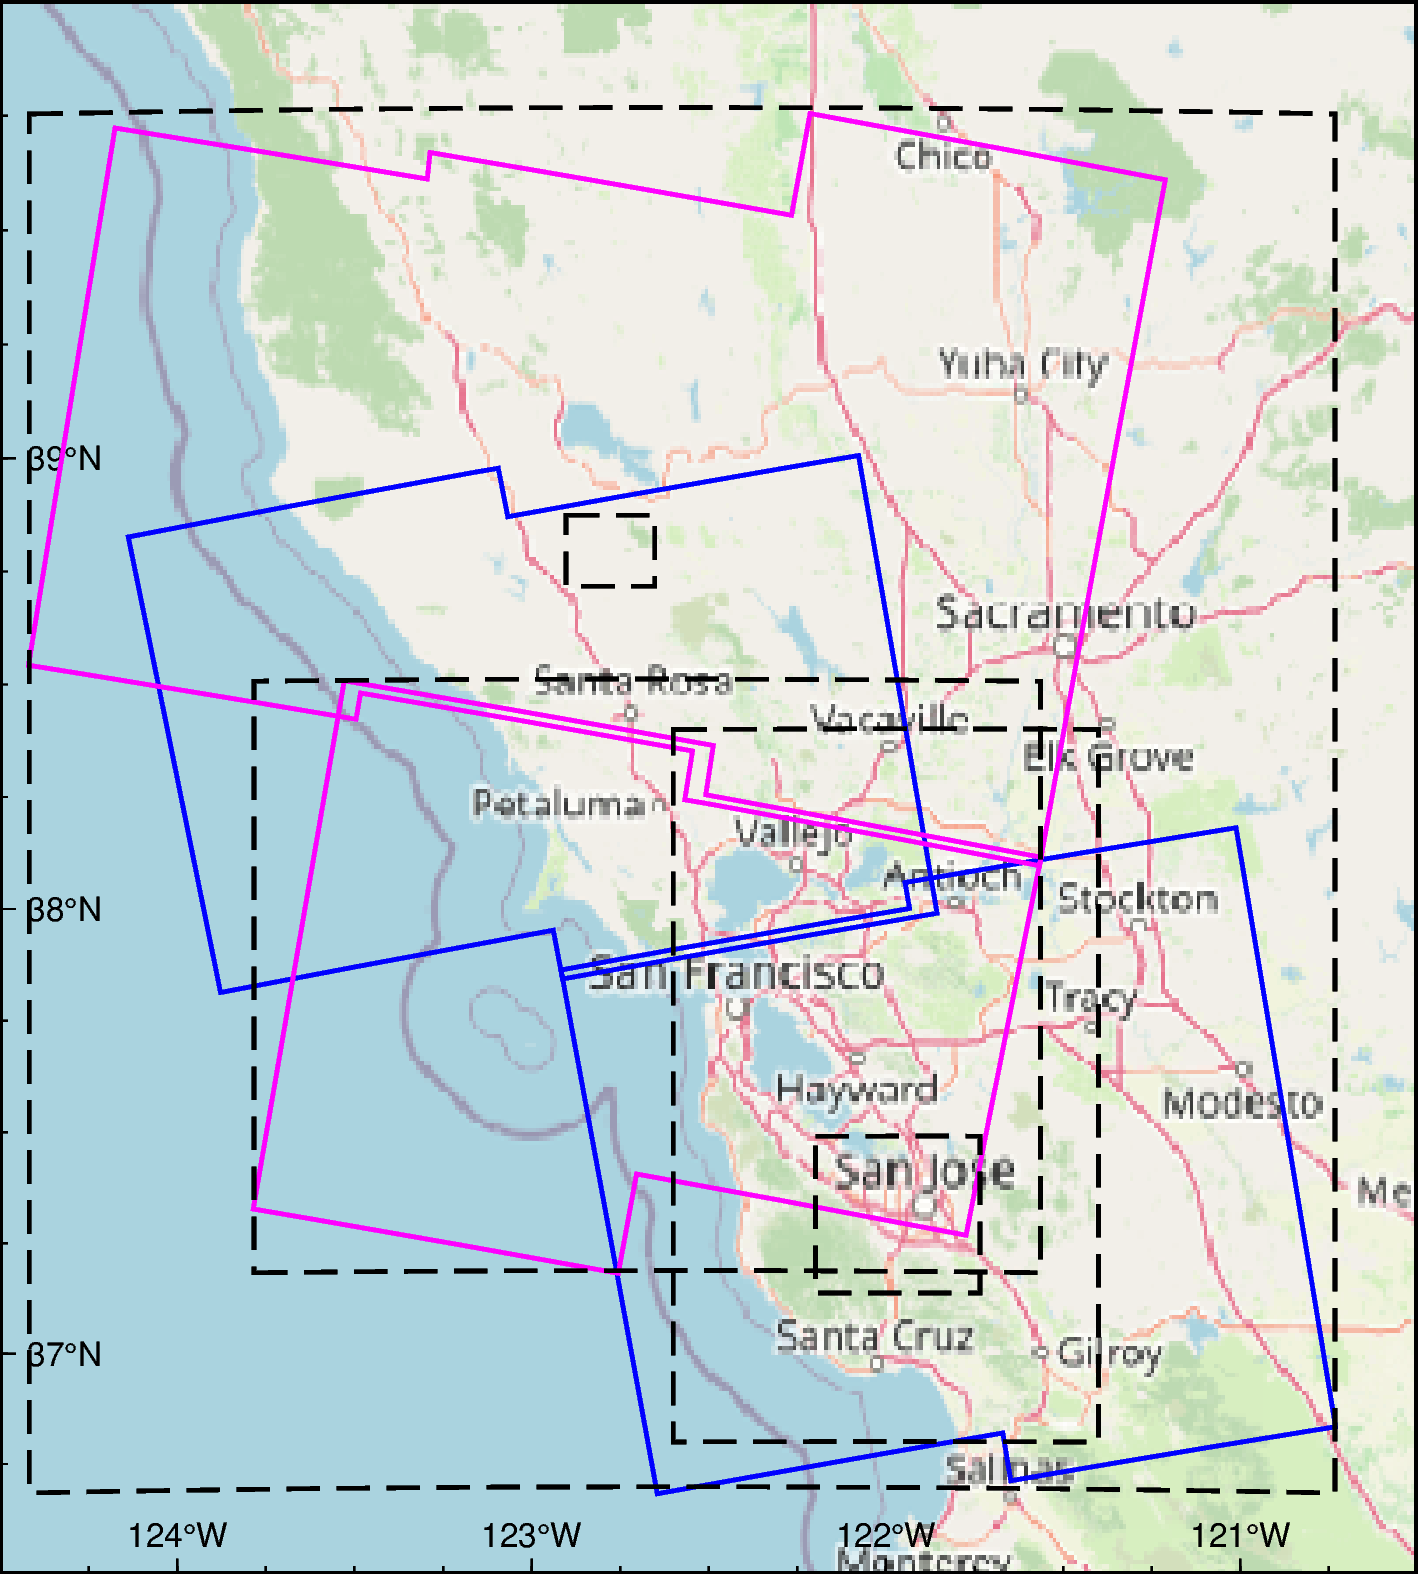

In [1]:
import contextily
import pygmt

fig = pygmt.Figure()

# Define figure configuration
pygmt.config(FONT_ANNOT_PRIMARY="8p")


with pygmt.config(MAP_FRAME_TYPE="inside"):
    fig.tilemap(
        region=[-124.5, -120.5, 36.5, 40],
        projection="M12c",
        # Set level of details (0-22)
        # Higher levels mean a zoom level closer to the Earth's
        # surface with more tiles covering a smaller
        # geographic area and thus more details and vice versa
        # Please note, not all zoom levels are always available
        zoom=7,
        # Use tiles from OpenStreetMap tile server
        source="https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png",
        frame="af",
    )


# AT35 first frame
fig.plot(x=[-123.8779, -124.1382, -123.0941, -123.0672, -122.0768, -121.8555, -122.9126, -122.9383, -123.8779], y=[37.8137, 38.8264, 38.9781, 38.8709, 39.0059, 37.9908, 37.8438, 37.9525, 37.8137], pen="1p,blue")
# Show the plot

# AT35_2 - lon = [-122.6449, -122.9168, -121.9332, -121.9458, -121.0117, -120.7306, -121.6473, -121.6702,-122.6449]
# lat = [36.6824, 37.8641, 38.0015, 38.0593, 38.1812, 36.8350, 36.7124, 36.8207, 36.6824]
fig.plot(x=[-122.6449, -122.9168, -121.9332, -121.9458, -121.0117, -120.7306, -121.6473, -121.6702,-122.6449], y=[36.6824, 37.8641, 38.0015, 38.0593, 38.1812, 36.8350, 36.7124, 36.8207, 36.6824], pen="1p,blue")

# DT115 first frame
# DT115 - lon = [-121.5624, -121.7739,-122.7034,-122.7549,-123.7850,-123.5287,-122.4871,-122.5080,-121.5624]
# lat = [38.1155, 37.2678, 37.4058, 37.1821, 37.3270, 38.5081, 38.3644, 38.2547, 38.1155]
fig.plot(x=[-121.5624, -121.7739,-122.7034,-122.7549,-123.7850,-123.5287,-122.4871,-122.5080,-121.5624],y=[38.1155, 37.2678, 37.4058, 37.1821, 37.3270, 38.5081, 38.3644, 38.2547, 38.1155],pen="1p,magenta")
    
# DT115_2 - lon = [-121.2115,-121.5665,-122.5672,-122.5458,-123.4825,-123.4952,-124.4195,-124.1754,-123.2940,-123.2864,-122.2659,-122.2139,-121.2115]
# lat = [39.6107,38.0969,38.2440,38.3520,38.4808,38.4226,38.5425,39.7232,39.6121,39.6701,39.5328,39.7548,39.6107]
fig.plot(x=[-121.2115,-121.5665,-122.5672,-122.5458,-123.4825,-123.4952,-124.4195,-124.1754,-123.2940,-123.2864,-122.2659,-122.2139,-121.2115],y=[39.6107,38.0969,38.2440,38.3520,38.4808,38.4226,38.5425,39.7232,39.6121,39.6701,39.5328,39.7548,39.6107],pen="1p,magenta")


# Figure 7
xmin1 = -123.78342344837763
xmax1 = -121.56381793378502
ymin1 = 38.50687453609234
ymax1 = 37.183417549614646

fig.plot(x=[xmin1, xmax1, xmax1, xmin1, xmin1], y=[ymax1, ymax1, ymin1, ymin1, ymax1], pen="1p,black,-")

# Figure 2 
xmin2 = -124.41758330168004
xmax2 = -120.73253394831625
ymin2 = 36.68453957392155
ymax2 = 39.75371678504366
fig.plot(x=[xmin2, xmax2, xmax2, xmin2, xmin2], y=[ymax2, ymax2, ymin2, ymin2, ymax2], pen="1p,black,-")

xmin3 = -122.6
ymin3 = 36.8
xmax3 = -121.4
ymax3 = 38.4
fig.plot(x=[xmin3, xmax3, xmax3, xmin3, xmin3], y=[ymax3, ymax3, ymin3, ymin3, ymax3], pen="1p,black,-")

xmin4 = -122.9023
xmax4 = -122.652
ymin4 = 38.7173
ymax4 = 38.874
fig.plot(x=[xmin4, xmax4, xmax4, xmin4, xmin4], y=[ymax4, ymax4, ymin4, ymin4, ymax4], pen="1p,black,-")

xmin5 = -122.1983
xmax5 = -121.7345
ymin5 = 37.1374
ymax5 = 37.4911
fig.plot(x=[xmin5, xmax5, xmax5, xmin5, xmin5], y=[ymax5, ymax5, ymin5, ymin5, ymax5], pen="1p,black,-")


fig.show()

In [11]:
#fig.savefig("fig1_par2.eps", dpi=400)

gmtread [WARNING]: (n - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
gmtread [WARNING]: n reset from 62.45 to 62.5


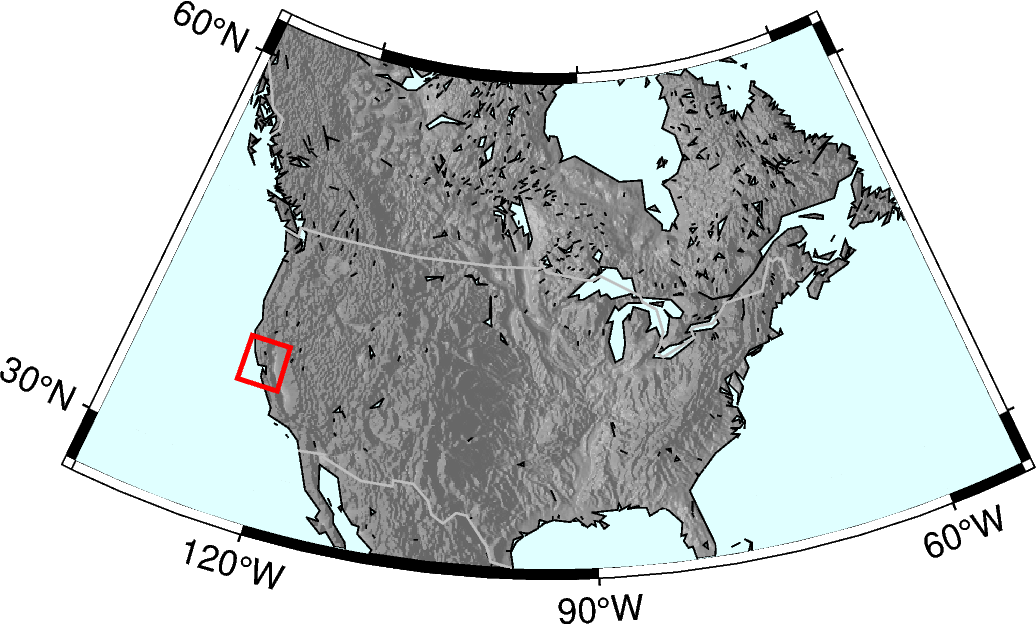

In [1]:
# add another figure for inset 

import pygmt
import csv
import numpy as np


grid = pygmt.datasets.load_earth_relief(
    resolution="06m", region=[-135, -53.5, 26, 62.45]
)

dgrid = pygmt.grdgradient(grid=grid, radiance=[270, 45])

fig = pygmt.Figure()
#pygmt.config(MAP_FRAME_TYPE="inside")

#fig.grdimage(grid=grid, frame="a", projection="M15c", cmap="oleron")
pygmt.makecpt(cmap="gray", series=[-3, 2, 0.05])
fig.grdimage(grid=dgrid, frame="a", projection="L-94/44/33/45/8c", cmap=True)
fig.coast(shorelines="0.3p", water="lightcyan", borders=["1/0.5p,gray"])

fig.plot(data=np.array([[-124.5,36.5,-120.5,40]]), style='r+s', pen="1p,red")

fig.show()

In [ ]:
#fig.savefig("fig1_par3.eps", dpi=400)